<a href="https://colab.research.google.com/github/FarooqBaig/Emotion-Detection/blob/main/NewFerrrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [3]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [4]:
! gdown --id 1PfeXBYOGdwXehjx-xKj90DO1cG7tSMt-

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PfeXBYOGdwXehjx-xKj90DO1cG7tSMt-
To: /content/FERRR.zip
100% 42.7M/42.7M [00:01<00:00, 21.7MB/s]


In [8]:
!unzip 'FERRR.zip'

Streaming output truncated to the last 5000 lines.
  inflating: FER2/train/sad/Training_73359813.jpg  
  inflating: FER2/train/sad/Training_73361195.jpg  
  inflating: FER2/train/sad/Training_73374075.jpg  
  inflating: FER2/train/sad/Training_73381526.jpg  
  inflating: FER2/train/sad/Training_7338492.jpg  
  inflating: FER2/train/sad/Training_73393003.jpg  
  inflating: FER2/train/sad/Training_73408195.jpg  
  inflating: FER2/train/sad/Training_73440556.jpg  
  inflating: FER2/train/sad/Training_73491794.jpg  
  inflating: FER2/train/sad/Training_73514241.jpg  
  inflating: FER2/train/sad/Training_73517508.jpg  
  inflating: FER2/train/sad/Training_73530752.jpg  
  inflating: FER2/train/sad/Training_73535020.jpg  
  inflating: FER2/train/sad/Training_73550785.jpg  
  inflating: FER2/train/sad/Training_73563278.jpg  
  inflating: FER2/train/sad/Training_73569064.jpg  
  inflating: FER2/train/sad/Training_73593223.jpg  
  inflating: FER2/train/sad/Training_7360259.jpg  
  inflating: FE

In [9]:
picture_size = 48
folder_path = "FER2/"

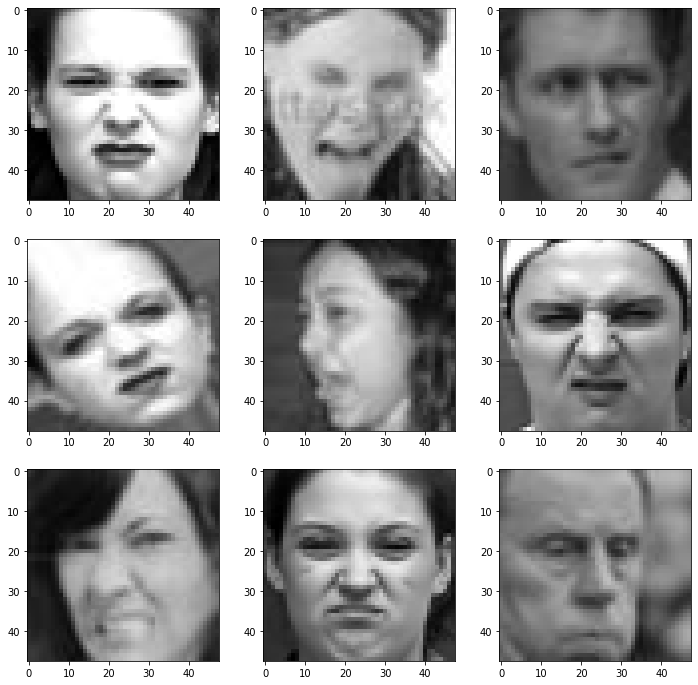

In [10]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [11]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 29486 images belonging to 7 classes.
Found 7563 images belonging to 7 classes.


In [12]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(128,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#6th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=16,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=16,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
230/230 [==============================] - ETA: 0s - loss: 1.8051 - accuracy: 0.3018

230/230 [==============================] - 34s 104ms/step - loss: 1.8051 - accuracy: 0.3018 - val_loss: 1.6129 - val_accuracy: 0.3656 - lr: 0.0010
Epoch 2/48
230/230 [==============================] - ETA: 0s - loss: 1.4653 - accuracy: 0.4381

230/230 [==============================] - 23s 101ms/step - loss: 1.4653 - accuracy: 0.4381 - val_loss: 1.9572 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 3/48
230/230 [==============================] - ETA: 0s - loss: 1.2850 - accuracy: 0.5072

230/230 [==============================] - 24s 103ms/step - loss: 1.2850 - accuracy: 0.5072 - val_loss: 1.2413 - val_accuracy: 0.5381 - lr: 0.0010
Epoch 4/48
230/230 [==============================] - ETA: 0s - loss: 1.1789 - accuracy: 0.5526

230/230 [==============================] - 24s 103ms/step - loss: 1.1789 - accuracy: 0.5526 - val_loss: 1.2188 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 5/48
230/230 [==============================] - ETA: 0s - loss: 1.1119 - accuracy: 0.5799

230/230 [==============================] - 23s 102ms/step - loss: 1.1119 - accuracy: 0.5799 - val_loss: 1.1594 - val_accuracy: 0.5673 - lr: 0.0010
Epoch 6/48
230/230 [==============================] - ETA: 0s - loss: 1.0647 - accuracy: 0.5990

230/230 [==============================] - 24s 104ms/step - loss: 1.0647 - accuracy: 0.5990 - val_loss: 1.2003 - val_accuracy: 0.5544 - lr: 0.0010
Epoch 7/48
230/230 [==============================] - ETA: 0s - loss: 1.0213 - accuracy: 0.6171

230/230 [==============================] - 24s 102ms/step - loss: 1.0213 - accuracy: 0.6171 - val_loss: 1.0957 - val_accuracy: 0.5969 - lr: 0.0010
Epoch 8/48
230/230 [==============================] - ETA: 0s - loss: 0.9723 - accuracy: 0.6357

230/230 [==============================] - 23s 101ms/step - loss: 0.9723 - accuracy: 0.6357 - val_loss: 1.0665 - val_accuracy: 0.6065 - lr: 0.0010
Epoch 9/48
230/230 [==============================] - ETA: 0s - loss: 0.9346 - accuracy: 0.6479

230/230 [==============================] - 24s 104ms/step - loss: 0.9346 - accuracy: 0.6479 - val_loss: 1.0668 - val_accuracy: 0.6087 - lr: 0.0010
Epoch 10/48
230/230 [==============================] - ETA: 0s - loss: 0.8942 - accuracy: 0.6655

230/230 [==============================] - 24s 103ms/step - loss: 0.8942 - accuracy: 0.6655 - val_loss: 1.0219 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 11/48
230/230 [==============================] - ETA: 0s - loss: 0.8486 - accuracy: 0.6809

230/230 [==============================] - 23s 101ms/step - loss: 0.8486 - accuracy: 0.6809 - val_loss: 1.1309 - val_accuracy: 0.5924 - lr: 0.0010
Epoch 12/48
230/230 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.6993

230/230 [==============================] - 24s 104ms/step - loss: 0.8047 - accuracy: 0.6993 - val_loss: 0.9960 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 13/48
230/230 [==============================] - ETA: 0s - loss: 0.7643 - accuracy: 0.7161

230/230 [==============================] - 24s 102ms/step - loss: 0.7643 - accuracy: 0.7161 - val_loss: 1.0318 - val_accuracy: 0.6242 - lr: 0.0010
Epoch 14/48
230/230 [==============================] - ETA: 0s - loss: 0.7227 - accuracy: 0.7317

230/230 [==============================] - 23s 101ms/step - loss: 0.7227 - accuracy: 0.7317 - val_loss: 1.1162 - val_accuracy: 0.6168 - lr: 0.0010
Epoch 15/48
230/230 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.7462

230/230 [==============================] - 24s 103ms/step - loss: 0.6852 - accuracy: 0.7462 - val_loss: 1.0159 - val_accuracy: 0.6405 - lr: 0.0010
Epoch 16/48
230/230 [==============================] - ETA: 0s - loss: 0.6415 - accuracy: 0.7614

230/230 [==============================] - 23s 102ms/step - loss: 0.6415 - accuracy: 0.7614 - val_loss: 1.1202 - val_accuracy: 0.6193 - lr: 0.0010
Epoch 17/48
230/230 [==============================] - ETA: 0s - loss: 0.5934 - accuracy: 0.7795

230/230 [==============================] - 23s 101ms/step - loss: 0.5934 - accuracy: 0.7795 - val_loss: 1.1344 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 18/48
230/230 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7960

230/230 [==============================] - 24s 103ms/step - loss: 0.5529 - accuracy: 0.7960 - val_loss: 1.0729 - val_accuracy: 0.6421 - lr: 0.0010
Epoch 19/48
230/230 [==============================] - ETA: 0s - loss: 0.5177 - accuracy: 0.8090

230/230 [==============================] - 23s 101ms/step - loss: 0.5177 - accuracy: 0.8090 - val_loss: 1.3937 - val_accuracy: 0.6057 - lr: 0.0010
Epoch 20/48
230/230 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.8208

230/230 [==============================] - 24s 102ms/step - loss: 0.4821 - accuracy: 0.8208 - val_loss: 1.2053 - val_accuracy: 0.6303 - lr: 0.0010
Epoch 21/48
230/230 [==============================] - ETA: 0s - loss: 0.4524 - accuracy: 0.8348

230/230 [==============================] - 23s 101ms/step - loss: 0.4524 - accuracy: 0.8348 - val_loss: 1.3273 - val_accuracy: 0.6296 - lr: 0.0010
Epoch 22/48
230/230 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8447

230/230 [==============================] - 24s 103ms/step - loss: 0.4214 - accuracy: 0.8447 - val_loss: 1.2465 - val_accuracy: 0.6430 - lr: 0.0010
Epoch 23/48
230/230 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.8603

230/230 [==============================] - 23s 102ms/step - loss: 0.3829 - accuracy: 0.8603 - val_loss: 1.2517 - val_accuracy: 0.6419 - lr: 0.0010
Epoch 24/48
230/230 [==============================] - ETA: 0s - loss: 0.3567 - accuracy: 0.8701

230/230 [==============================] - 24s 104ms/step - loss: 0.3567 - accuracy: 0.8701 - val_loss: 1.3113 - val_accuracy: 0.6552 - lr: 0.0010
Epoch 25/48
230/230 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.8726

230/230 [==============================] - 23s 101ms/step - loss: 0.3426 - accuracy: 0.8726 - val_loss: 1.3025 - val_accuracy: 0.6529 - lr: 0.0010
Epoch 26/48
230/230 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.8868

230/230 [==============================] - 24s 105ms/step - loss: 0.3144 - accuracy: 0.8868 - val_loss: 1.2664 - val_accuracy: 0.6483 - lr: 0.0010
Epoch 27/48
230/230 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.8927

230/230 [==============================] - 23s 101ms/step - loss: 0.2959 - accuracy: 0.8927 - val_loss: 1.2902 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 28/48
230/230 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.8991Restoring model weights from the end of the best epoch: 12.



Epoch 28: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
230/230 [==============================] - 24s 103ms/step - loss: 0.2805 - accuracy: 0.8991 - val_loss: 1.4630 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 28: early stopping


In [ ]:
model.save_weights('face_emotion_model.h5')

In [ ]:
model.save('accurate_model.h5')

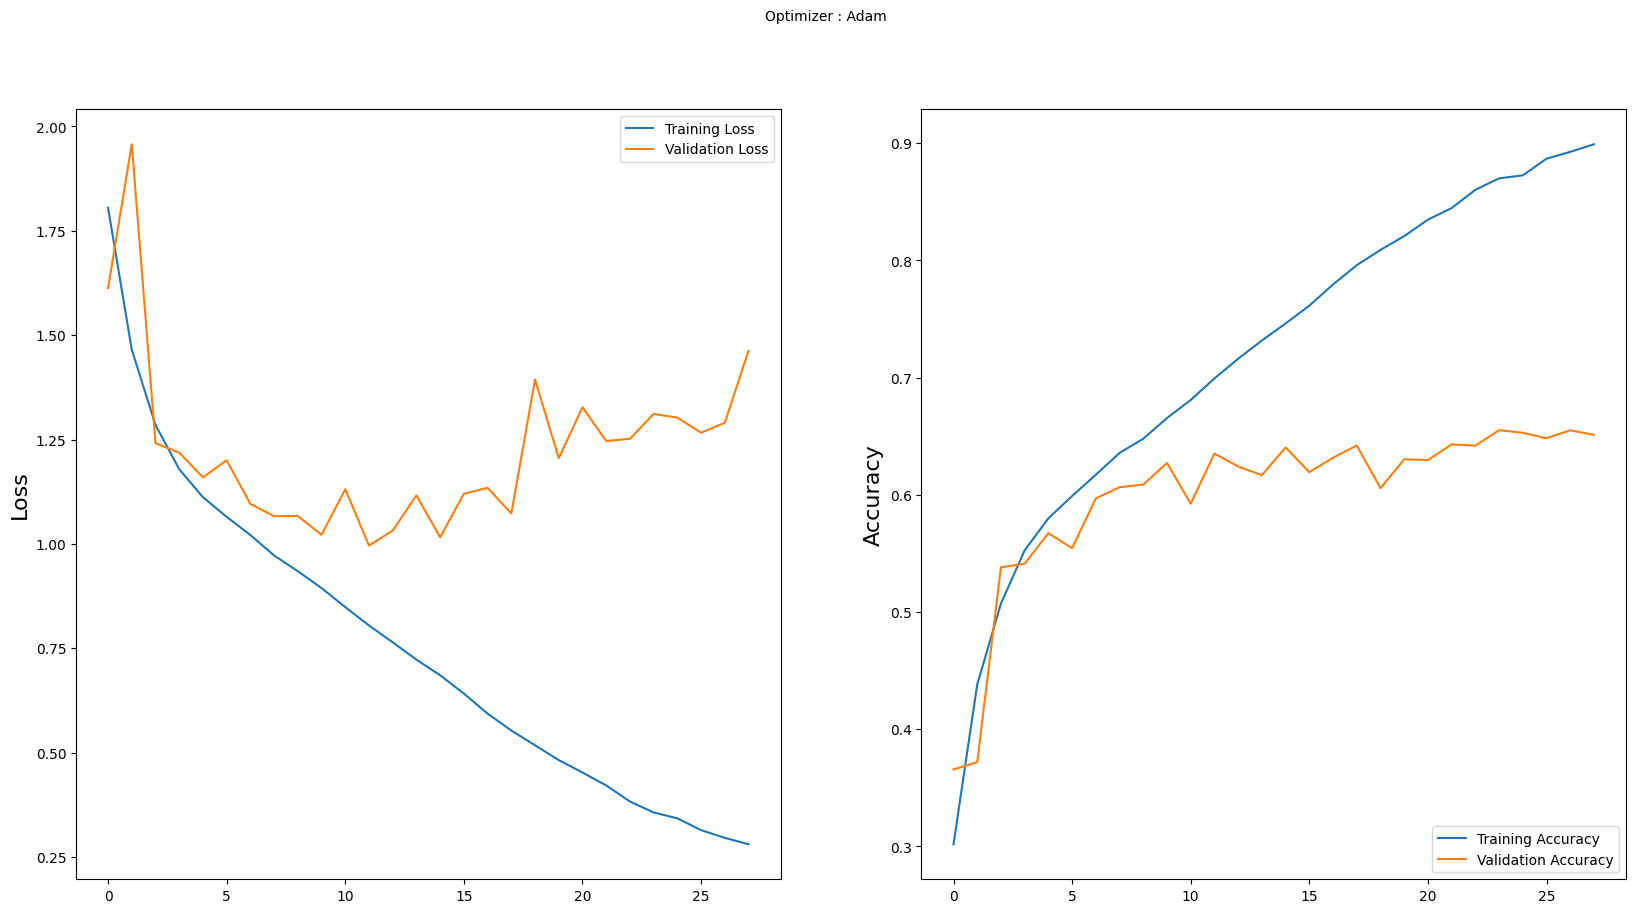

In [16]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
!cp newacc.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/' 